In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('COVID-19-geographic-disbtribution-worldwide-2020-07-02.xlsx', header=0)
df.head()
df['dateRep'] = pd.to_datetime(df['dateRep'])
df

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp
0,2020-07-02,2,7,2020,319,28,Afghanistan,AF,AFG,38041757.0,Asia
1,2020-07-01,1,7,2020,279,13,Afghanistan,AF,AFG,38041757.0,Asia
2,2020-06-30,30,6,2020,271,12,Afghanistan,AF,AFG,38041757.0,Asia
3,2020-06-29,29,6,2020,351,18,Afghanistan,AF,AFG,38041757.0,Asia
4,2020-06-28,28,6,2020,165,20,Afghanistan,AF,AFG,38041757.0,Asia
...,...,...,...,...,...,...,...,...,...,...,...
27186,2020-03-25,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa
27187,2020-03-24,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14645473.0,Africa
27188,2020-03-23,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa
27189,2020-03-22,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa


# When did Countries get their first Covid cases

In [3]:
df['countriesAndTerritories']= df.countriesAndTerritories.str.replace('_',' ')
df.countriesAndTerritories.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius and Saba', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cases on an international conveyance Japan', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Costa Rica', 'Cote dIvoire', 'Croatia',
       'Cuba', 'CuraÃ§ao', 'Cyprus', 'Czechia',
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Er

In [4]:
## df.sort_values(['countriesAndTerritories', 'dateRep'], inplace = True)
df1 = df[df['cases']>1]
popdata = df1.popData2019.unique()
# print(df1.head())
grouped = df1.groupby('countriesAndTerritories').agg({'dateRep':'min'})

grouped.sort_values('dateRep',inplace=True)
num_countries = np.arange(1,len(grouped)+1)
grouped['num'] = num_countries
grouped


,dateRep,num
countriesAndTerritories,,
China,2019-12-31,1
Thailand,2020-01-22,2
Singapore,2020-01-24,3
Vietnam,2020-01-24,4
Malaysia,2020-01-25,5
...,...,...
Yemen,2020-04-30,206
Tajikistan,2020-05-01,207
Comoros,2020-05-04,208


<IPython.core.display.Javascript object>


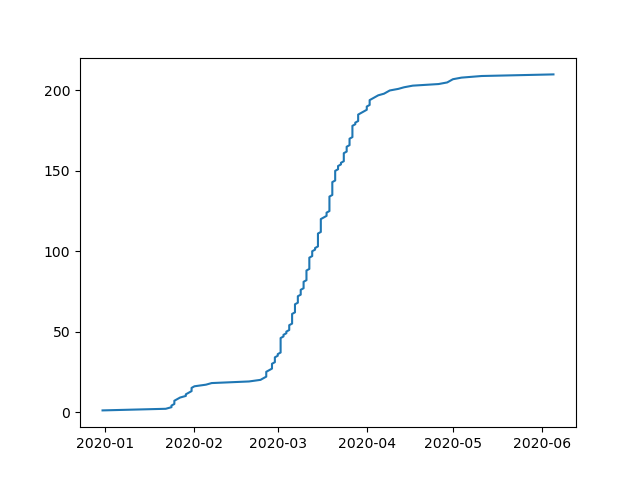

In [5]:
plt.figure()
plt.plot(grouped['dateRep'],grouped['num'])

# Exploring India

In [6]:
indf = df[df['countriesAndTerritories']=='India']
indf = indf[indf['cases']>0]
indf = indf.copy()
indf.sort_values('dateRep', ascending = True, inplace=True)
indf['Total'] = indf['cases'].cumsum()
indf

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Total
11869,2020-01-30,30,1,2020,1,0,India,IN,IND,1.366418e+09,Asia,1
11866,2020-02-02,2,2,2020,1,0,India,IN,IND,1.366418e+09,Asia,2
11864,2020-02-04,4,2,2020,1,0,India,IN,IND,1.366418e+09,Asia,3
11836,2020-03-03,3,3,2020,2,0,India,IN,IND,1.366418e+09,Asia,5
11835,2020-03-04,4,3,2020,1,0,India,IN,IND,1.366418e+09,Asia,6
...,...,...,...,...,...,...,...,...,...,...,...,...
11720,2020-06-28,28,6,2020,19906,410,India,IN,IND,1.366418e+09,Asia,528859
11719,2020-06-29,29,6,2020,19459,380,India,IN,IND,1.366418e+09,Asia,548318
11718,2020-06-30,30,6,2020,18522,418,India,IN,IND,1.366418e+09,Asia,566840
11717,2020-07-01,1,7,2020,18653,507,India,IN,IND,1.366418e+09,Asia,585493


<IPython.core.display.Javascript object>


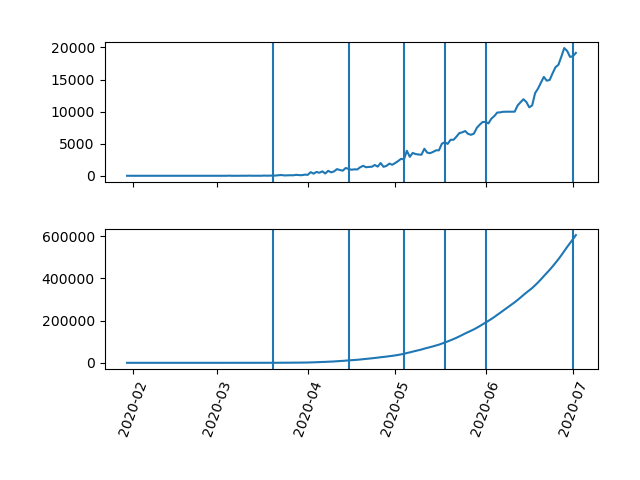

AxesSubplot(0.125,0.11;0.775x0.35)


In [7]:
fig, (ax1,ax2) = plt.subplots(2,1, sharex=True)
degrees = 70
print(plt.gca())

ax1.plot(indf['dateRep'],indf['cases'])
plt.xticks(rotation=degrees)
ax2.plot(indf['dateRep'],indf['Total'])
# plt.xticks(rotation=degrees)
fig.tight_layout(pad=3.0)

In [8]:
ld_dates = ['2020-03-20','2020-04-15','2020-05-04','2020-05-18',
           '2020-06-01','2020-07-01']
for date in ld_dates:
    plt.axvline(pd.to_datetime(date))
    ax1.axvline(pd.to_datetime(date))

# Lockdown Dates of different Countries

In [9]:
ldf = pd.read_csv('lockdown dates.txt',sep='\t', header=1)
pd.set_option('display.max_rows', 500)
ldf.head()

,Countries and territories,Start date,End date,Level
0,Albania,2020-03-13[3],2020-06-01[4],National
1,Algeria,2020-03-23[5],2020-05-14[6],City
2,Argentina,2020-03-19[7],2020-06-28[8],National
3,Armenia,2020-03-24[9],2020-05-04[10],NaN
4,Australia,2020-03-23[11],NaN,NaN


In [22]:
ldf['Start date'] = ldf['Start date'].str.replace("\[.*\]","",regex=True)
ldf['End date'] = ldf['End date'].str.replace("\[.*\]","",regex=True)
ldf['Start date'] = pd.to_datetime(ldf['Start date'])
ldf['End date']= pd.to_datetime(ldf['End date'])
ldf['Countries and territories']=ldf['Countries and territories'].str.strip()

In [42]:
add_countries = pd.DataFrame({'Countries and territories':['China','Brazil','Fiji','Ghana','United States'],
                             'Start date':pd.to_datetime(['2020-01-23','2020-07-03','2020-07-03','2020-03-30','2020-03-20']),
                             'End date':pd.to_datetime(['2020-03-25','','','2020-04-12','2020-05-01']),
                             'Level':['Provincial','','','','']})
ldf.append(add_countries, ignore_index=True)

,Countries and territories,Start date,End date,Level
0,Albania,2020-03-13,2020-06-01,National
1,Algeria,2020-03-23,2020-05-14,City
2,Argentina,2020-03-19,2020-06-28,National
3,Armenia,2020-03-24,2020-05-04,NaN
4,Australia,2020-03-23,NaT,NaN
5,Austria,2020-03-16,2020-04-13,NaN
6,Azerbaijan,2020-03-31,2020-04-20,NaN
7,Bangladesh,2020-03-26,2020-05-16,NaN
8,Barbados,2020-03-28,2020-05-03,NaN
9,Belgium,2020-03-18,2020-05-04,NaN


In [14]:
#grouped.merge(ldf,left_index=True, right_on='Countries and territories', how='outer').set_index('Countries and territories')

In [28]:
world = df.groupby('dateRep').sum()
world['Total'] = world.cases.cumsum()
world['Total'] = world['Total']/10000
world

,day,month,year,cases,deaths,popData2019,Total
dateRep,,,,,,,
2019-12-31,2077,804,135273,27,0,5.800630e+09,0.0027
2020-01-01,67,67,135340,0,0,5.800630e+09,0.0027
2020-01-02,134,67,135340,0,0,5.800630e+09,0.0027
2020-01-03,201,67,135340,17,0,5.800630e+09,0.0044
2020-01-04,268,67,135340,0,0,5.800630e+09,0.0044
2020-01-05,335,67,135340,15,0,5.800630e+09,0.0059
2020-01-06,402,67,135340,0,0,5.800630e+09,0.0059
2020-01-07,469,67,135340,0,0,5.800630e+09,0.0059
2020-01-08,536,67,135340,0,0,5.800630e+09,0.0059


In [32]:
# ldf[not ldf['Start date']]
dates = list(ldf.loc['Start date'])

<IPython.core.display.Javascript object>


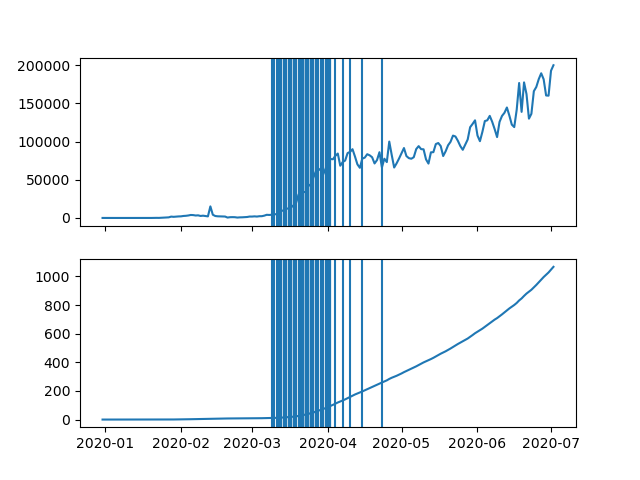

In [33]:
fig, (ax1,ax2) = plt.subplots(2,1,sharex=True)
ax1.plot(world['cases'])
ax2.plot(world['Total'])
for date in dates:
    plt.axvline(pd.to_datetime(date))
    ax1.axvline(pd.to_datetime(date))